# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [196]:
# Checking the number of mice.
merge_data['Mouse ID'].nunique()

249

In [197]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df=merge_data.loc[merge_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [198]:
# Optional: Get all the data for the duplicate mouse ID. 
df_id = merge_data.loc[merge_data["Mouse ID"] == "g989"]
df_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [199]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = merge_data.loc[merge_data["Mouse ID"] != "g989"]
df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [200]:
# Checking the number of mice in the clean DataFrame.
df_cleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use the df_cleaned dataframe and groupby "Drug Regimen", then take the stats of Tumor Volume
drug_mean=df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median=df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance=df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std=df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem=df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Create dictionary of list

cols_agg = {
    "Mean Tumor Volume": drug_mean,
    "Median Tumor Volume": drug_median,
    "Tumor Volume Variance": drug_variance,
    "Tumor Volume Std. Dev.": drug_std,
    "Tumor Volume Std. Err.": drug_sem

}

# Use dictionary of list to create dataframe
summary=pd.DataFrame(cols_agg)

summary


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [202]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = df_cleaned.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

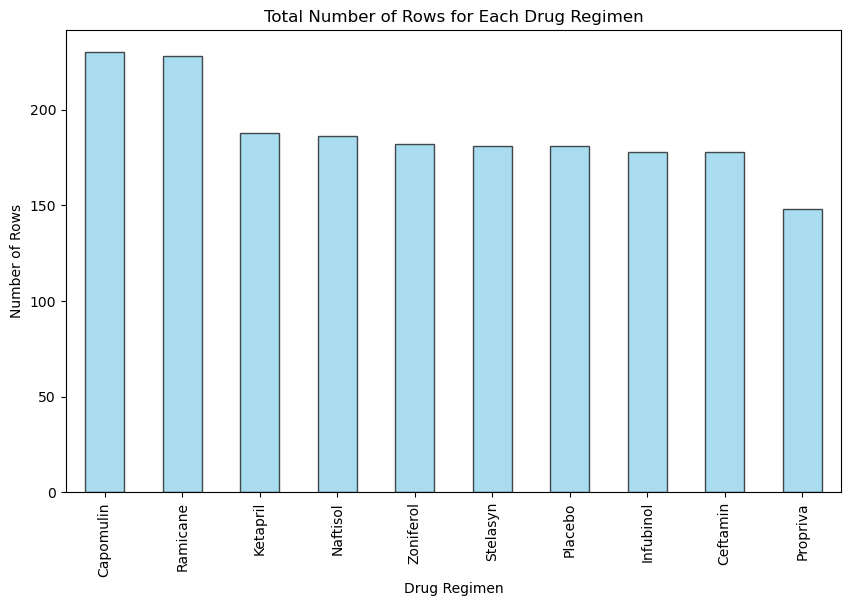

In [203]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Group the data by the drug regimen and count the number of rows
drug_regimen_counts = df_cleaned['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

In [204]:

total_rows.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

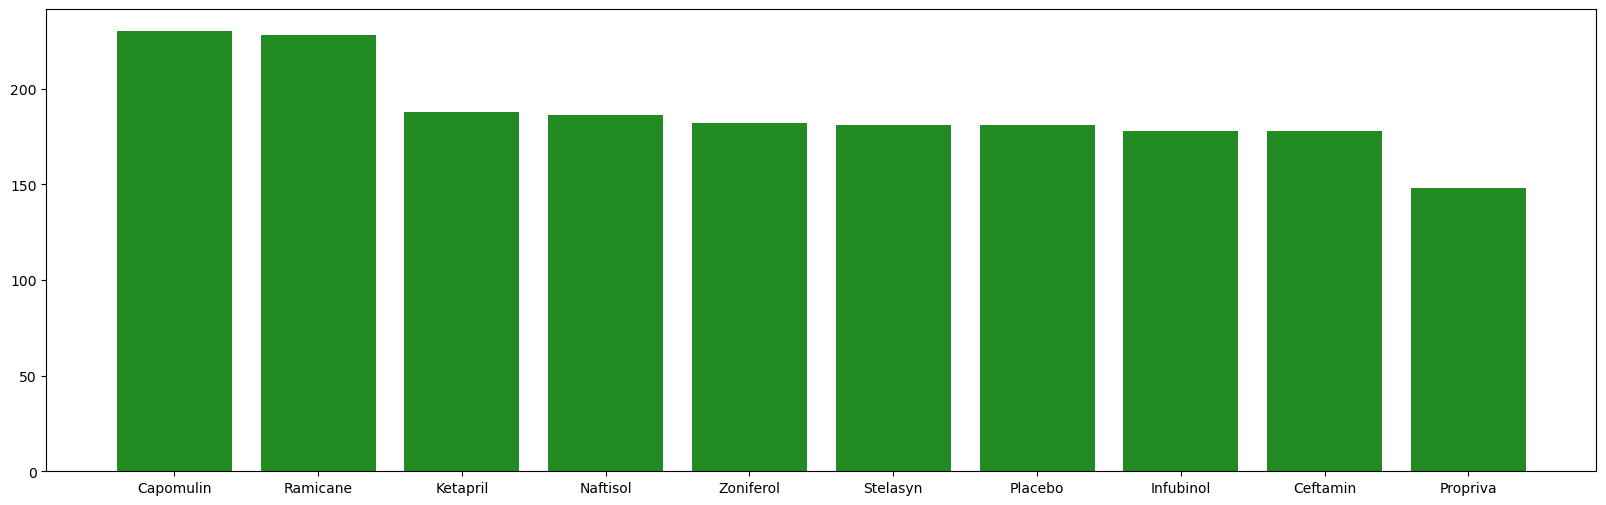

In [205]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#step 1 get data
#get drug regimen value and name. Then get the index for x axis and value for y axis
total_rows = df_cleaned['Drug Regimen'].value_counts()
#2 initialize graph
plt.figure(figsize=(20,6))
#3 create skeleton
plt.bar(list(total_rows.index), total_rows.values, color="forestgreen")
#4 customize

#show
plt.show()

In [206]:
gender=df_cleaned["Sex"].value_counts()
gender

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='Sex'>

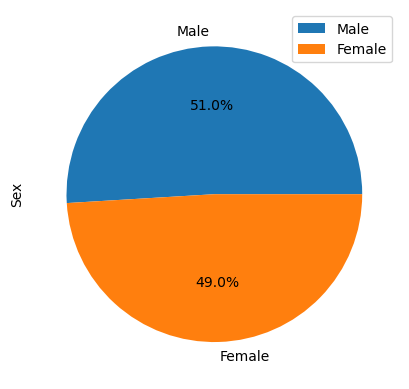

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=df_cleaned["Sex"].value_counts()
data = {'Gender': ['Male', 'Female'],
        'Sex': gender}
df = pd.DataFrame(data)
df.plot(kind='pie', y='Sex', labels=df['Gender'], autopct='%1.1f%%')

In [208]:
gender=df_cleaned["Sex"].value_counts()
gender

Sex
Male      958
Female    922
Name: count, dtype: int64

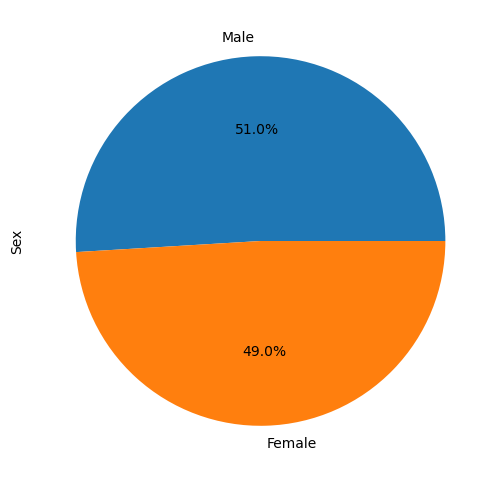

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=df_cleaned["Sex"].value_counts()
Sex=['Male', 'Female']
#2 initialize graph
plt.figure(figsize=(20,6))
#3 create skeleton
plt.pie(gender, labels=Sex, autopct='%1.1f%%')

#4 customize
plt.ylabel("Sex")
#show
plt.show()

## Quartiles, Outliers and Boxplots

In [210]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df= df_cleaned.groupby(["Mouse ID"]).Timepoint.max().reset_index()
sub=df_cleaned.loc[:, ["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_cleaned_max_tumor = pd.merge(max_tumor_df, sub, on=["Mouse ID", "Timepoint"])
mask=df_cleaned_max_tumor["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
filt_drug_df= df_cleaned_max_tumor.loc[mask].reset_index(drop=True) 
filt_drug_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [211]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


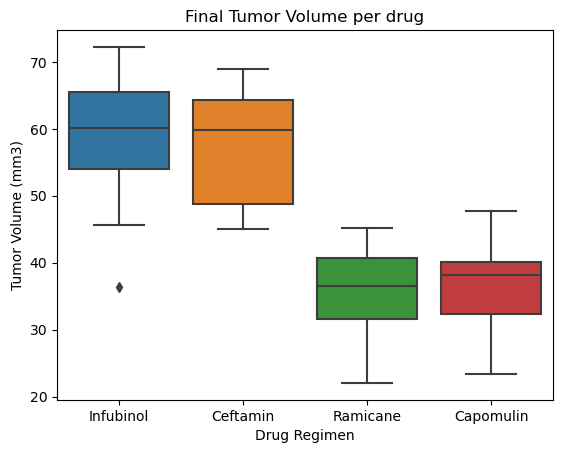

In [212]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=filt_drug_df, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume per drug")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for b128')

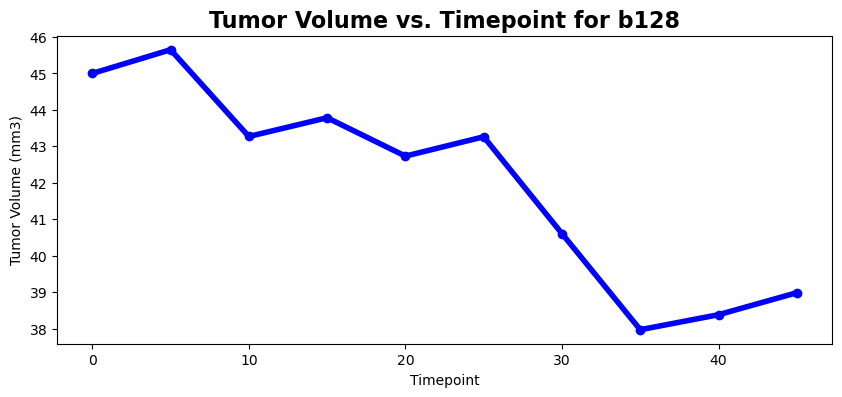

In [219]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=df_cleaned.loc[df_cleaned["Drug Regimen"] == "Capomulin"]
mouse = "b128"

data = df_cleaned.loc[df_cleaned["Mouse ID"] == mouse]

# get data
time = data["Timepoint"]
y = data["Tumor Volume (mm3)"]

#initialize grapgh
plt.figure(figsize=(10, 4))

#create graph
plt.plot(time, y, color="blue", linewidth=4, marker="o")

#customize
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for {mouse}", fontsize=16, fontweight="bold")


Text(0.5, 1.0, 'Tumor Volume vs. Weight for Capomulin')

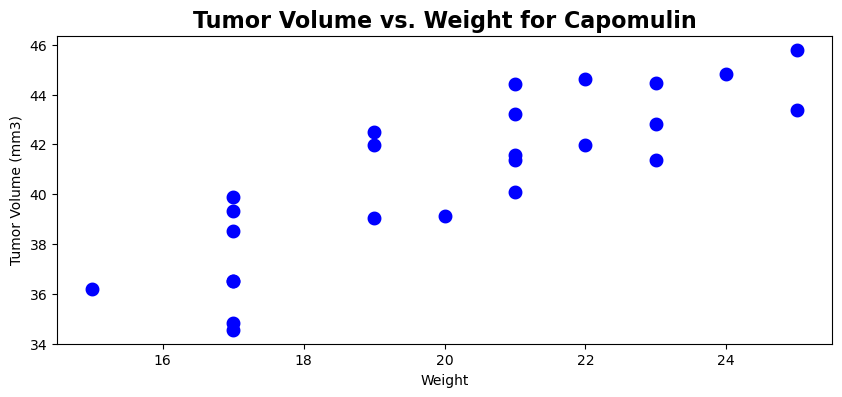

In [220]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data=df_cleaned.loc[df_cleaned["Drug Regimen"] == "Capomulin"]
mouse_average=data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

#get data
x=mouse_average["Weight (g)"]
y=mouse_average["Tumor Volume (mm3)"]
#initialize grapgh
plt.figure(figsize=(10, 4))

#create graph
plt.scatter(x,y, color="blue", linewidth=4, marker="o")

#customize
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Weight for Capomulin", fontsize=16, fontweight="bold")


## Correlation and Regression

In [221]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

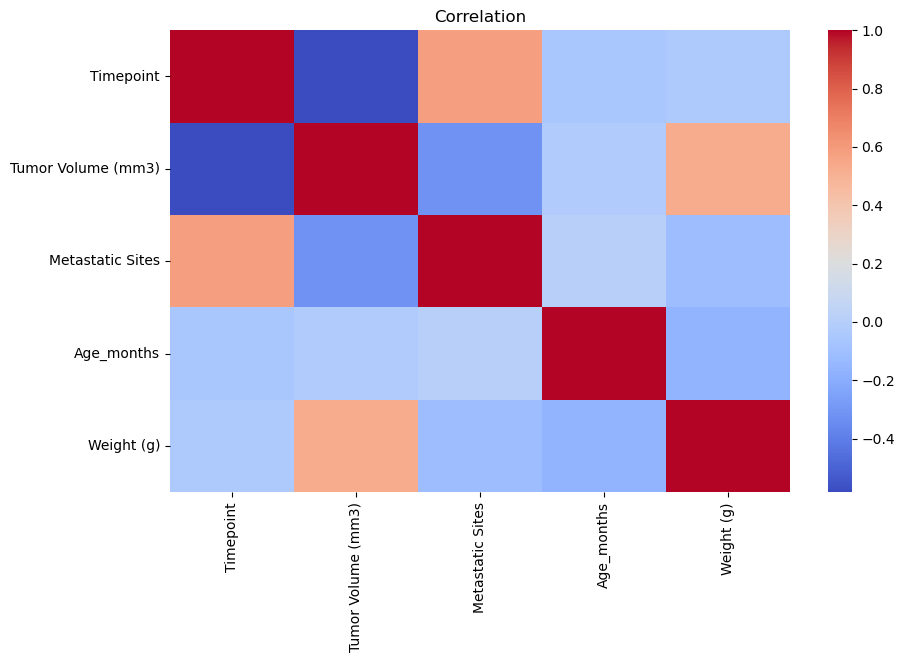

In [222]:
corrs = capomulin_df.corr(numeric_only = True)

plt.figure(figsize=(10,6))

sns.heatmap(corrs, cmap="coolwarm")
plt.title("Correlation")
plt.show()